## Sun path and MPO exclusion areas

This is a Python Jupyter Notebook to illustrate how to visualize the sun path projected from the spacecraft point of view. (projection on the sphere that uses the spacecraft frame as reference and origin)

First thing we will do is indicate that we want the Python package matplotlib to be output in the notebook and to import the SpiceyPy package to use SPICE. We also ensure that project_path module is include, this will allow us get access to common packages and resources

In [1]:
from project_path import data_path

import spiceypy as cspice
import matplotlib.pyplot as plt
from matplotlib import patches
import os
import numpy as np


Module path /Users/randres/git/spice/ess-jupyternb/src loaded
Using data_path: /Users/randres/git/spice/ess-jupyternb/data
SPICE volume DISABLED. Kernels will be provided as data by the user


We will setup the kernel set for the spice library, that will be used along the notebook

In [2]:
cspice.kclear()
cspice.furnsh('/Users/randres/git/spice/bepicolombo/kernels/mk/bc_plan.tm')

The **plot_sun** function plots the projection of the sun path during the period passed as argument

In [3]:
def plot_sun(utc0, utcf, color):
    et0 = cspice.utc2et(utc0)
    etf = cspice.utc2et(utcf)
    times = np.linspace(et0, etf, 1000)
    sun_radec = []
    for et in times:
        r_sun = cspice.spkpos('SUN', et, 'MPO_SPACECRAFT', 'NONE', "MPO")[0]
        radec = np.rad2deg(cspice.reclat(r_sun))
        sun_radec.append([radec[1], radec[2]])
    sun_radec = np.asarray(sun_radec)
    plt.plot(sun_radec[:, 0], sun_radec[:, 1], color=color, label=utc0)
    return

The **plot_mpo_exclusion_areas** displays the projection of exclusion areas in the MPO frame. Those are fixed and based on operational constraints:
* Red ones represent ...
* Blue ones represent ...

In [4]:
def plot_mpo_exclusion_areas():
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.add_patch(patches.Rectangle((-180, -90), 180, 180, color='green'))
    ax.add_patch(patches.Rectangle((-180, 50), 360, 40, color='red'))
    ax.add_patch(patches.Circle((90, 22.5), 17.5, color='blue'))
    ax.add_patch(patches.Circle((-135, -10), 40.0, color='red'))
    ax.add_patch(patches.Circle((-45, -10), 40.0, color='red'))
    ax.add_patch(patches.Circle((-90, -50), 40.0, color='red'))
    ax.set_aspect('equal', 'box')
    ax.set_xlabel('Azimuth [deg]')
    ax.set_ylabel('Elevation [deg]')
    ax.set_title('Sun exclusion')
    ax.set(xlim=(-180, 180), ylim=(-90, 90))

A combination of both can be used to check if the sun path invades an exclusion area in certain period

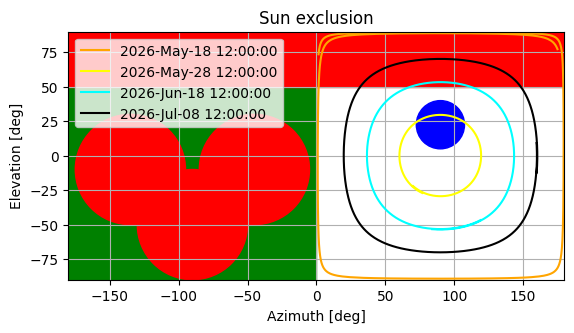

In [5]:
plot_mpo_exclusion_areas()

plot_sun('2026-May-18 12:00:00', '2026-May-18 14:30:00', 'orange')
plot_sun('2026-May-28 12:00:00', '2026-May-28 14:30:00', 'yellow')
plot_sun('2026-Jun-18 12:00:00', '2026-Jun-18 14:30:00', 'cyan')
plot_sun('2026-Jul-08 12:00:00', '2026-Jul-08 14:30:00', 'black')

plt.grid()
plt.legend()
plt.show()